## <font color='pink'> Homework 4 - Gaussian Processes

In [1]:
import numpy as np
import csv
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from numpy.random import multivariate_normal
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

### Question 2.

#### a)

In [2]:
d = 10
num_samples = 10000
Gaussian_a = np.random.multivariate_normal(np.zeros(d), np.identity(d), num_samples)
squared_l = np.sum(Gaussian_a**2, axis = 1)

Text(0.5, 1.0, 'Histogram of Squared L2 Norm')

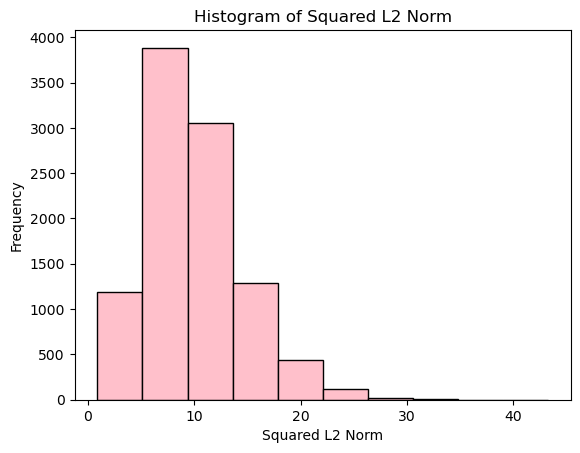

In [3]:
plt.hist(squared_l, color='pink', edgecolor='black')
plt.xlabel('Squared L2 Norm')
plt.ylabel('Frequency')
plt.title('Histogram of Squared L2 Norm')

The typical squared length seems to be 10.

#### b)

In [4]:
d = 100
num_samples = 10000
Gaussian_b = np.random.multivariate_normal(np.zeros(d), np.identity(d), num_samples)
squared_l = np.sum(Gaussian_b**2, axis = 1)

Text(0.5, 1.0, 'Histogram of Squared L2 Norm')

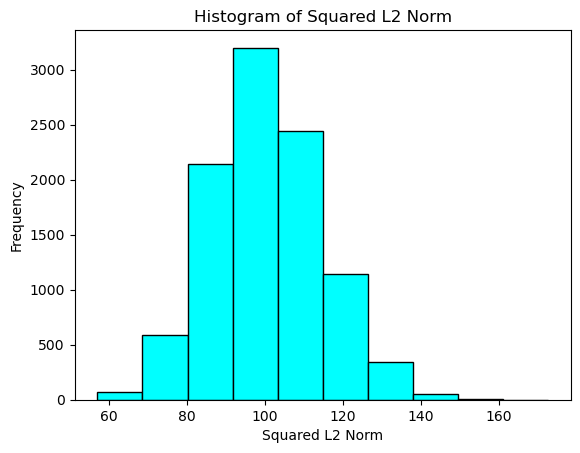

In [5]:
plt.hist(squared_l, color='cyan', edgecolor='black')
plt.xlabel('Squared L2 Norm')
plt.ylabel('Frequency')
plt.title('Histogram of Squared L2 Norm')

It is less concentrated than a. This is because the volume of the space increases exponentially with the dimensionality. As a result, in high-dimensional spaces, data points become more sparse

### Question 5.

#### a) 

In [6]:
def readCSV(path):
    with open(path, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            yield row

In [7]:
dataTrain = []
for l in readCSV("gptrain.csv"):
    dataTrain.append(l)

In [8]:
dataTest = []
for l in readCSV("gptest.csv"):
    dataTest.append(l)

In [9]:
dataTrain = np.array(dataTrain)
Xtr = dataTrain[:, :-1] 
ytr = dataTrain[:, -1]   

In [10]:
dataTest = np.array(dataTest)
Xtst = dataTest[:, :-1] 
ytst = dataTest[:, -1]  

In [11]:
Xtr.shape

(93, 2)

In [12]:
def gaussian_cov(x, x_prime, std_dev):
    r = np.exp(-np.linalg.norm(x - x_prime) / std_dev)
    return r


In [24]:
m_tr = np.ones(93)*20 

In [14]:
std_dev = 1.5

In [15]:
Xtr = Xtr.astype(float)
Xtst = Xtst.astype(float)

K_tr = np.array([[gaussian_cov(Xtr[i], Xtr[j], std_dev) for j in range(len(Xtr))] for i in range(len(Xtr))])
K_te = np.array([[gaussian_cov(Xtst[i], Xtst[j], std_dev) for j in range(len(Xtst))] for i in range(len(Xtst))])
K_tr_inv = np.linalg.inv(K_tr)

In [16]:
K_trte = np.array([[gaussian_cov(Xtr[i], Xtst[j], std_dev) for j in range(len(Xtst))] for i in range(len(Xtr))])
K_tetr = K_trte.T

In [18]:
ytr = ytr.astype(float)
ytst= ytst.astype(float)

In [42]:
N_mean = (K_tetr @ K_tr_inv) * (ytr - m_tr)
N_cov = K_te - (K_tetr@K_tr_inv@K_trte)

N_mean_ = np.mean(N_mean, axis=1)

In [43]:
m_te = np.mean(ytst)

In [47]:
mean_post = m_te + N_mean_

In [50]:
mse_post = mse(mean_post, ytst) #ytst - mean yte
print(mse_post)

6.0875106147083695


In [56]:
average = np.mean(ytr)
average_mse = mse(np.full_like(ytst, average), ytst) #yte , 
print(average_mse)

6.422837006905684


#### c) 

In [63]:
lat_max = max(Xtr[:, 0])
lat_min = min(Xtr[:, 0])
lon_max = max(Xtr[:, 1])
lon_min = min(Xtr[:, 1])

In [64]:
lat_val = np.linspace(lat_min, lat_max, num=100)
lon_val = np.linspace(lon_min, lon_max, num=100)

In [81]:
lat_mesh, lon_mesh = np.meshgrid(lat_val, lon_val)

In [84]:
coordinates = np.vstack((lat_mesh.flatten(), lon_mesh.flatten()))

In [91]:
mean_post_reshaped = mean_post[:, np.newaxis]
mean_post_mesh = np.tile(mean_post_reshaped, (1, lat_mesh.shape[1]))
mean_post_mesh = mean_post_mesh.T
print(mean_post_mesh.shape)

(100, 11)


In [94]:
min(ytr)

14.0

Text(0.5, 1.0, 'Predicted Temperature with Training Stations')

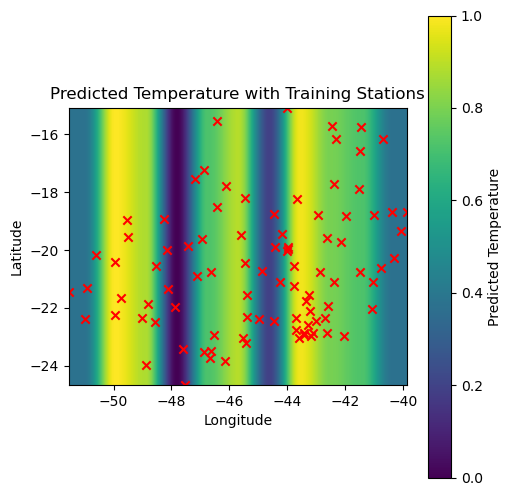

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.imshow(mean_post_mesh, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', cmap='viridis')
plt.scatter(Xtr[:, 1], Xtr[:, 0], c='red', marker='x', label='Training Stations')
plt.colorbar(label='Predicted Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Temperature with Training Stations')

In [104]:
cov_post_reshaped = N_cov[:, np.newaxis]
cov_post_mesh = np.tile(cov_post_reshaped, (1, lat_mesh.shape[1]))
cov_post_mesh = cov_post_mesh.T
print(cov_post_mesh.shape)

(1100, 1, 11)


Text(0.5, 1.0, 'Standard Deviation with Training Stations')

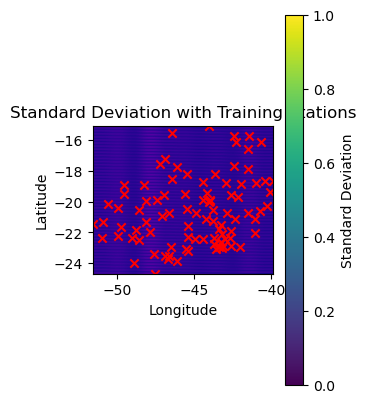

In [110]:
plt.subplot(1, 2, 2)

cov_post_mesh_reshaped = cov_post_mesh[:, 0, :]

plt.subplot(1, 2, 2)
plt.imshow(cov_post_mesh_reshaped, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', cmap='plasma')
plt.scatter(Xtr[:, 1], Xtr[:, 0], c='red', marker='x', label='Training Stations')
plt.colorbar(label='Standard Deviation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Standard Deviation with Training Stations')